In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from swifd import SwiModel

plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 8
plt.rcParams["figure.autolayout"] = True # same as tight_layout after every plot

In [2]:
nlay = 3
ncol = 81
delx = 10
k = np.array([10, 0.05, 20])
S = 0.2 * np.ones(nlay)
Se = 1e-4 * np.ones(nlay)
z = np.zeros((nlay + 1, ncol))
z[0] = 0
z[1] = -10
z[2] = -12
z[3] = -40
zt = z[:-1]
zb = z[1:]
N = 0.001
Qf = [[0, icol, N * delx] for icol in np.arange(ncol)]
hb = 0
fixed = [[0, 0, hb], [0, ncol - 1, hb]]
rhof = 1000
rhos = 1025
hfini = np.zeros((nlay, ncol))
hsini = np.zeros((nlay, ncol))
nstep = 1
delt = 1

In [3]:
ml = SwiModel(nlay, ncol, delx)
ml.tdis(nstep, delt, hfini, hsini)
ml.aquifer(k, np.zeros(3), np.zeros(3), zb, zt, rhof, rhos)
ml.set_source(Qf)
ml.set_fixed(fixed, fixed)
hfsol, zetasol = ml.simulate_freshonly(silent=False)

iterations: 11


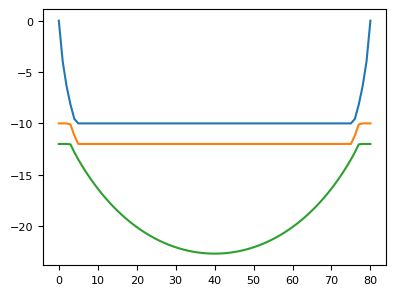

In [4]:
for i in range(3):
    plt.plot(zetasol[1, i])

In [5]:
ml.budget_fresh_step(hfsol[1], hfsol[0], hsini, hsini)

,layer 0,layer 1,layer 2,total
Source,7.900000e-01,0.000000e+00,0.000000e+00,7.900000e-01
Fixed,-7.896050e-01,-3.950292e-04,0.000000e+00,-7.900000e-01
GHB,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Drain,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Qtop,0.000000e+00,3.950292e-04,-6.648138e-14,3.950292e-04
Qbot,-3.950292e-04,6.648138e-14,0.000000e+00,-3.950292e-04
storage_increase,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
in_min_out,5.290907e-15,-1.003809e-15,-6.648138e-14,-6.219428e-14
balance,5.290907e-15,-1.003809e-15,-6.648138e-14,-6.219428e-14


In [6]:
nlay = 3
ncol = 41
delx = 20
k = np.array([10, 0.05, 20])
S = 0.2 * np.ones(nlay)
Se = 1e-4 * np.ones(nlay)
z = np.zeros((nlay + 1, ncol))
z[0] = 0
z[1] = -10
z[2] = -12
z[3] = -40
zt = z[:-1]
zb = z[1:]
N = 0.001
Qf = [[0, icol, N * delx] for icol in np.arange(ncol)]
hb = 0
fixed = [[0, 0, hb], [0, ncol - 1, hb]]
rhof = 1000
rhos = 1025
hfini = np.zeros((nlay, ncol))
hsini = np.zeros((nlay, ncol))
nstep = 10
delt = 730

In [7]:
ml = SwiModel(nlay, ncol, delx, xleftc=-1000)
ml.tdis(nstep=nstep, delt=delt, hfini=hfini, hsini=hsini)
ml.aquifer(k, S=S, Se=Se, zb=zb, zt=zt, rhof=rhof, rhos=rhos) # zero storage means instantaneous steady state
ml.set_source(Qf)
ml.set_fixed(fixed, fixed)
hsol, zetasol = ml.simulate_freshonly()

iterations: 5
iterations: 4
iterations: 4
iterations: 5
iterations: 4
iterations: 5
iterations: 5
iterations: 5
iterations: 5
iterations: 5


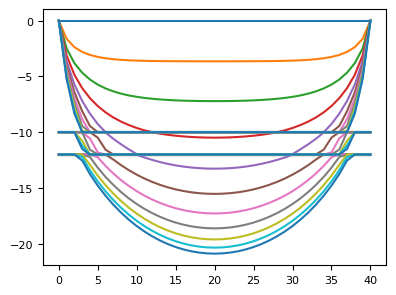

In [8]:
for i in range(nstep + 1):
    for j in range(nlay):
        plt.plot(zetasol[i, j], 'C' + str(i))

In [9]:
istep = 3
ml.budget_fresh_step(hsol[istep + 1], hsol[istep], hsini, hsini)

,layer 0,layer 1,layer 2,total
Source,5.694000e+02,0.000000e+00,0.000000e+00,5.694000e+02
Fixed,-2.417458e+02,-1.327855e-01,0.000000e+00,-2.418786e+02
GHB,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Drain,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Qtop,0.000000e+00,2.414743e+02,6.909278e+01,3.105671e+02
Qbot,-2.414743e+02,-6.909278e+01,0.000000e+00,-3.105671e+02
storage_increase,8.617986e+01,1.722488e+02,6.909278e+01,3.275214e+02
in_min_out,8.617986e+01,1.722488e+02,6.909278e+01,3.275214e+02
balance,6.963319e-12,3.126388e-13,1.421085e-13,7.418066e-12


layer 0
layer 1
layer 2
total


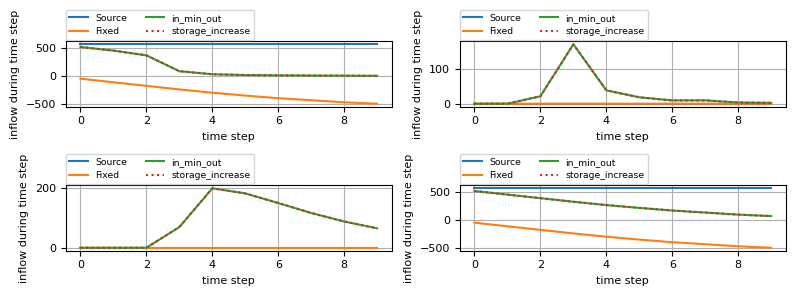

In [10]:
plt.figure(figsize=(8, 3))
bud = ml.budget_fresh(hsol)
keys = bud.keys()
for i, key in enumerate(bud.keys()):
    print(key)
    ax1 = plt.subplot(2, 2, i + 1)
    bud[key][['Source', 'Fixed', 'in_min_out', 'storage_increase']].plot(grid=True, xlabel='time step', 
                    ylabel='inflow during time step', ax=ax1, style=3 * ['-'] + [':']).legend (loc=(0, 1.02), ncol=2, fontsize='small')

In [11]:
ml = SwiModel(nlay, ncol, delx, xleftc=-1000)
ml.tdis(nstep=nstep, delt=delt, hfini=hfini, hsini=hsini)
ml.aquifer(k, S=S, Se=Se, zb=zb, zt=zt, rhof=rhof, rhos=rhos)
ml.set_source(Qf)
ml.set_fixed(fixed, fixed)
hf, hs, zeta = ml.simulate()

iterations: 7
iterations: 4
iterations: 4
iterations: 6
iterations: 6
iterations: 6
iterations: 6
iterations: 6
iterations: 5
iterations: 5


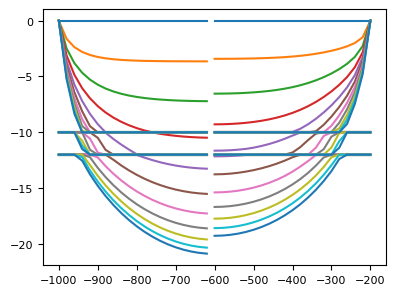

In [12]:
for i in range(nstep + 1):
    for j in range(nlay):
        plt.plot(ml.xc[:ml.ncol // 2], zetasol[i, j, :ml.ncol // 2], 'C' + str(i))
        plt.plot(ml.xc[ml.ncol // 2:], zeta[i, j, ml.ncol // 2:], 'C' + str(i))

In [13]:
istep = 3
ml.budget_fresh_step(hf[istep + 1], hf[istep], hs[istep + 1], hs[istep])

,layer 0,layer 1,layer 2,total
Source,5.694000e+02,0.000000e+00,0.000000e+00,5.694000e+02
Fixed,-2.917960e+02,-1.778155e-01,0.000000e+00,-2.919738e+02
GHB,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Drain,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Qtop,0.000000e+00,1.035403e+02,3.615334e+00,1.071556e+02
Qbot,-1.035403e+02,-3.615334e+00,0.000000e+00,-1.071556e+02
storage_increase,1.740637e+02,9.974712e+01,3.615334e+00,2.774262e+02
in_min_out,1.740637e+02,9.974712e+01,3.615334e+00,2.774262e+02
balance,8.554935e-12,1.108447e-12,-1.829648e-13,9.480416e-12


In [14]:
istep = 7
ml.budget_salt_step(hs[istep + 1], hs[istep], hf[istep + 1], hf[istep])

,layer 0,layer 1,layer 2,total
Source,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Fixed,-8.833461e+01,-5.195596e+01,0.000000e+00,-1.402906e+02
GHB,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Drain,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Qtop,0.000000e+00,-7.490181e+01,-1.148447e+02,-1.897465e+02
Qbot,7.490181e+01,1.148447e+02,0.000000e+00,1.897465e+02
storage_increase,-1.343281e+01,-1.201308e+01,-1.148447e+02,-1.402906e+02
in_min_out,-1.343281e+01,-1.201308e+01,-1.148447e+02,-1.402906e+02
balance,-3.499423e-13,1.083578e-13,-5.911716e-12,-6.153300e-12


layer 0
layer 1
layer 2
total


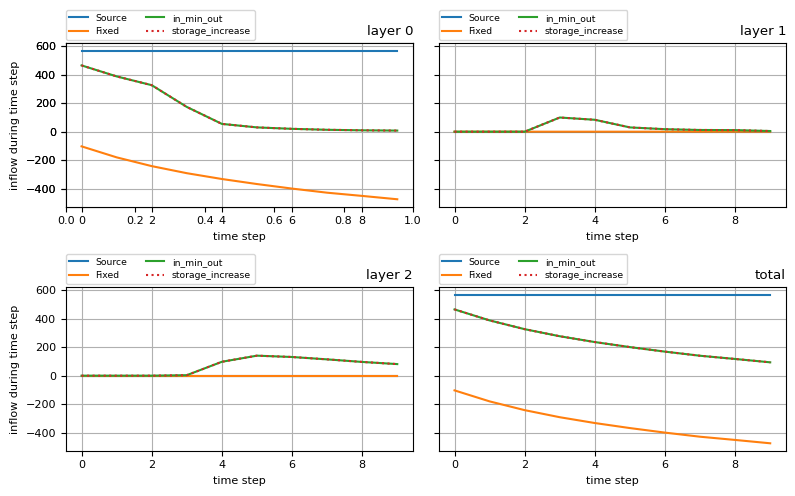

In [15]:
plt.figure(figsize=(8, 5))
bud = ml.budget_fresh(hf, hs)
keys = bud.keys()
ax0 = plt.subplot(2, 2, 1)
for i, key in enumerate(bud.keys()):
    print(key)
    ax1 = plt.subplot(2, 2, i + 1, sharey=ax0)
    bud[key][['Source', 'Fixed', 'in_min_out', 'storage_increase']].plot(grid=True, xlabel='time step', 
                    ylabel='inflow during time step', ax=ax1, style=3 * ['-'] + [':']).legend (loc=(0, 1.02), ncol=2, fontsize='small')
    plt.title(key, loc='right')

layer 0
layer 1
layer 2
total


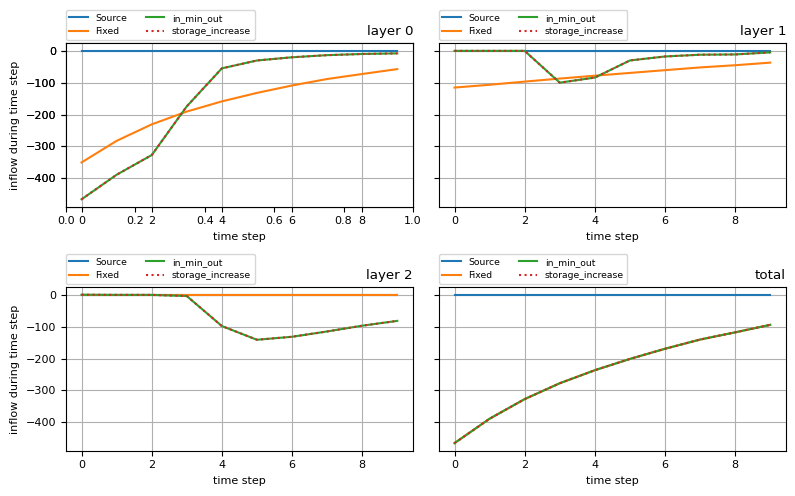

In [16]:
plt.figure(figsize=(8, 5))
bud = ml.budget_salt(hf, hs)
keys = bud.keys()
ax0 = plt.subplot(2, 2, 1)
for i, key in enumerate(bud.keys()):
    print(key)
    ax1 = plt.subplot(2, 2, i + 1, sharey=ax0)
    bud[key][['Source', 'Fixed', 'in_min_out', 'storage_increase']].plot(grid=True, xlabel='time step', 
                    ylabel='inflow during time step', ax=ax1, style=3 * ['-'] + [':']).legend (loc=(0, 1.02), ncol=2, fontsize='small')
    plt.title(key, loc='right')